Kaggle是个很棒的地方,对于数据科学家和机器学习工程师来说，这是一个知识的金矿。可以在同一地点找到由本领域专家带来的高质量，高效，可重现，很棒的代码。自推出以来，它已经举办了164场比赛。这些比赛吸引了来自世界各地的专家和专家加入该平台。结果，每场比赛以及Kaggle提供的大量开源数据集都有许多高质量的笔记本和脚本。

在数据科学之旅的开始，我将去Kaggle查找数据集以练习我的技能。每当我查看其他内核时，我都会对代码的复杂性感到不知所措，然后马上回避。

但是现在，我发现自己花费了大量时间阅读其他笔记本并提交竞赛文件。有时候，有些东西值得您度过整个周末。有时，我会发现简单但致命的有效代码技巧和最佳实践，这些技巧和最佳实践只能通过观察其他专家来学习。

在整个系列中，您会发现我在典型的数据科学工作流程中可能有用的任何内容，包括与通用库相关的代码快捷方式，Kaggle的顶级行业专家遵循的最佳实践等，这些都是我在学习过程中学到的。 

# 1. 只绘制相关系数矩阵的下三角部分
好的相关矩阵可以说明数据集中目标变量之间的相关性

In [1]:
import pandas as pd

df = pd.read_csv('data/melbourne_housing_raw.csv')
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,3/9/16,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,3/12/16,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,4/2/16,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,Rounds,4/2/16,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,4/3/17,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


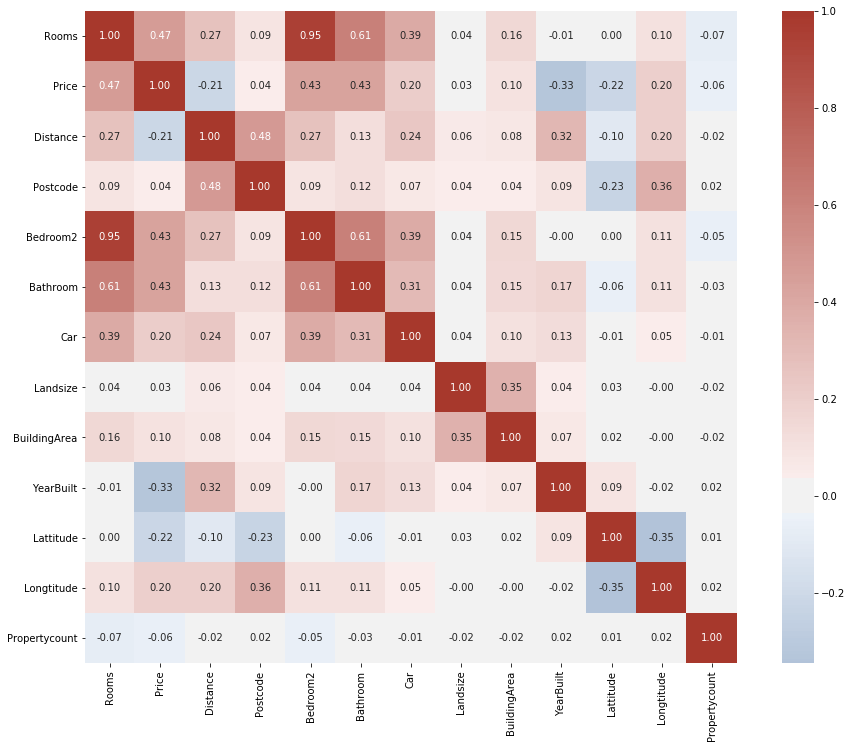

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

sns.heatmap(df.corr(), center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

plt.show()

但上图中，数据集中存在大量的特征，导致相似矩阵过于庞大，让人看起来不知所措。

相关矩阵大部分沿主对角线对称，因此它们包含重复数据。 同样，对角线本身也没有用。 让我们看看如何只绘制有用的一半：

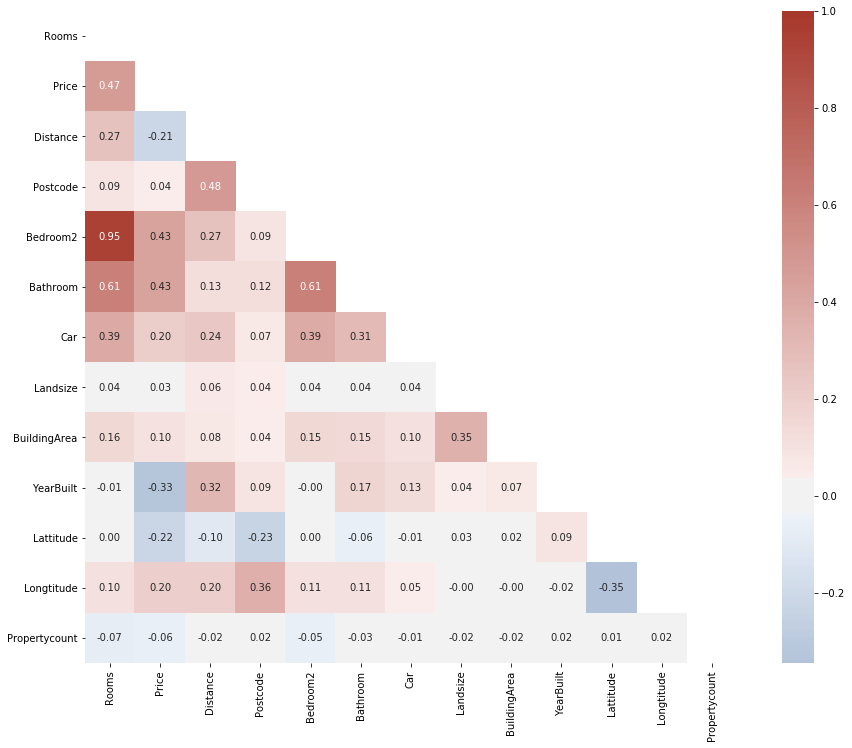

In [15]:
import numpy as np

# 计算相关系数
matrix = df.corr()

# 创建遮罩（为了只显示下三角）
mask = np.triu(np.ones_like(matrix, dtype=bool))

# 定制调色板
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

# 设定图片尺寸
plt.figure(figsize=(16, 12))

# 绘制相似矩阵热力图
sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

plt.show()

由此产生的可视化图更容易解释并且没有视觉干扰干扰。 

- 首先，我们使用DataFrame的.corr方法构建相关矩阵。 
- 然后，我们使用dtype设置为bool的np.ones_like函数来创建一个True矩阵，其形状与DataFrame相同：

In [29]:
np.ones((5, 5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [33]:
np.ones_like(np.ones((4, 4)), dtype=bool)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

将布尔方阵传递给Numpy的.triu函数，该函数将返回一个二维布尔蒙版，其中包含矩阵下三角的False值。 

In [32]:
np.triu(np.ones_like(np.ones((4, 4)), dtype=bool))

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

然后，我们可以将其传递给Seaborn的heatmap函数，以根据此蒙版对矩阵进行可视化

```python
ns.heatmap(matrix, mask=mask, center=0, annot=True,
               fmt='.2f', square=True, cmap=cmap)
```

# 2. value_counts考虑缺失值
使用value_counts时，可将dropna设置为False来查看任何列中缺失值的比例。通过确定缺失值的比例，可以决定是否丢弃含有缺失值的记录。 

In [35]:
#字段CouncilArea的数据分布情况
df.CouncilArea.value_counts(dropna=False, normalize=True).head()

Boroondara City Council    0.105431
Darebin City Council       0.081791
Moreland City Council      0.060877
Glen Eira City Council     0.057549
Melbourne City Council     0.056000
Name: CouncilArea, dtype: float64

但是，如果要查看**所有列**中缺失值的比例，则value_counts不是最佳选择。 相反，您可以执行以下操作：

1. 首先，通过将缺失值的数量除以DataFrame的长度来找到比例。 

2. 然后，您可以过滤掉0％的列，即i。 e。 只选择缺少值的列。

In [41]:
missing_props = df.isna().sum() / len(df)

missing_props[missing_props > 0].sort_values(ascending=False)

BuildingArea     0.605761
YearBuilt        0.553863
Landsize         0.338813
Car              0.250394
Bathroom         0.235993
Bedroom2         0.235735
Longtitude       0.228821
Lattitude        0.228821
Price            0.218321
Propertycount    0.000086
Regionname       0.000086
CouncilArea      0.000086
Postcode         0.000029
Distance         0.000029
dtype: float64

# 3. 使用Pandas的Styler
我们中的许多人从未意识到pandas的巨大潜力。pandas的一个被低估且经常被忽视的功能是其**对DataFrames进行样式设置**的能力。 使用pandas DataFrames的.style属性，可以将条件设计和样式应用于它们。 

作为第一个示例，让我们看看如何根据每个单元格的值来更改背景颜色：

In [45]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [46]:
pd.crosstab(diamonds.cut, diamonds.clarity).style.background_gradient(cmap='rocket_r')

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
cut,,,,,,,,
Fair,210,9,408,466,170,261,17,69
Good,96,71,1560,1081,648,978,186,286
Ideal,146,1212,4282,2598,3589,5071,2047,2606
Premium,205,230,3575,2949,1989,3357,616,870
Very Good,84,268,3240,2100,1775,2591,789,1235


几乎没有使用Seaborn的热图功能的热图。 在这里，我们使用pd.crosstab对钻石切割(cut)和净度(clarity)的每种组合进行计数。

将.style.background_gradient与调色板配合使用，您可以轻松地发现哪种组合出现得最多。 仅从上面的DataFrame中，我们可以看到大多数钻石都是“ VS2”净度类型。

我们甚至可以通过在交叉表中找到每种钻石切割cut和净度clarity组合的**平均价格**来进一步做到这一点：

In [51]:
pd.crosstab(diamonds.cut, diamonds.clarity, aggfunc=np.mean, values=diamonds.price).style.background_gradient(cmap='rocket_r')

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
cut,,,,,,,,
Fair,3703.533333,1912.333333,4208.279412,5173.916309,4165.141176,4174.724138,3871.352941,3349.768116
Good,3596.635417,4098.323944,3689.533333,4580.260870,3801.445988,4262.236196,2254.774194,3079.108392
Ideal,4335.726027,2272.913366,3752.118169,4755.952656,3489.744497,3284.550385,2468.129458,3250.290100
Premium,3947.331707,3856.143478,4455.269371,5545.936928,4485.462041,4550.331248,2831.206169,3795.122989
Very Good,4078.226190,4396.216418,3932.391049,4988.688095,3805.353239,4215.759552,2459.441065,3037.765182


通过将.format方法与格式字符串{：.2f}链接起来，我们指定了2个浮点数的精度。

In [52]:
agg_prices = pd.crosstab(diamonds.cut, diamonds.clarity, aggfunc=np.mean, values=diamonds.price).style.background_gradient(cmap='rocket_r')

agg_prices.format('{:.2f}')

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
cut,,,,,,,,
Fair,3703.53,1912.33,4208.28,5173.92,4165.14,4174.72,3871.35,3349.77
Good,3596.64,4098.32,3689.53,4580.26,3801.45,4262.24,2254.77,3079.11
Ideal,4335.73,2272.91,3752.12,4755.95,3489.74,3284.55,2468.13,3250.29
Premium,3947.33,3856.14,4455.27,5545.94,4485.46,4550.33,2831.21,3795.12
Very Good,4078.23,4396.22,3932.39,4988.69,3805.35,4215.76,2459.44,3037.77


# 4. matplotlib默认全局设置
在进行**探索性数据分析**时，您可能想对所有绘图应用自定义调色板，对刻度标签使用更大的字体，更改图例的位置，使用固定的图形大小等。

对绘图自定义参数的更改是一项非常无聊，重复且耗时的任务。 幸运的是，您可以使用Matplotlib的rcParams为绘图设置全局配置。

rcParams只是一个普通的Python字典，其中包含Matplotlib的默认设置：

In [55]:
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

您可以调整每个图的任意参数设置，一般的图像设置如固定图形大小，刻度标签字体大小以及其他一些参数。

通过这种设置，可以减少很多重复的代码量

In [ ]:
# 去掉顶部和右侧的线条Remove top and right spines
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

# 设置图的尺寸Set fixed figure size
rcParams['figure.figsize'] = [12, 9]

# 设置图片像素清晰度 Set dots per inch to 300, very high quality images
rcParams['figure.dpi'] = 300

# 设置自动调整布局Enable autolayout
rcParams['figure.autolayout'] = True

# 设置全局字号Set global fontsize
rcParams['font.style'] = 16

# 刻度字号Fontsize of ticklabels
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10

# 5. Pandas全局设置
就像Matplotlib一样，pandas具有可以使用的全局设置。 当然，它们大多数与显示选项有关。 

- **get_option()** -  获取pandas单个选项
- **set_option()** — 设置pandas单个选项
- **reset_option()** — 重置pandas选项值

In [60]:
#最大显示的列数
pd.get_option('display.max_columns')

df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,3/9/16,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,3/12/16,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,4/2/16,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,Rounds,4/2/16,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,4/3/17,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


我更喜欢显示所有的列，lets go

In [59]:
pd.set_option('display.max_columns', None)
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,3/9/16,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,3/12/16,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,4/2/16,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,Rounds,4/2/16,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,4/3/17,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
